1142.8525907469434


/Users/michielvanhouten/Dropbox/Mac/Documents/GitHub/abm/.venv/lib/python3.9/site-packages/mesa/time.py:82: FutureWarning: The AgentSet is experimental. It may be changed or removed in any and all future releases, including patch releases.
We would love to hear what you think about this new feature. If you have any thoughts, share them with us here: https://github.com/projectmesa/mesa/discussions/1919
  self._agents: AgentSet = AgentSet(agents, model)


Data 1:
Percentage EV's van Auto's: 0.9168081494057725
Hoeveelheid totale Subsidie: 1726776.1416821731
Percentage late majority met EV: 0.720754716981132
Percentage laggards met EV: 0.7063492063492064

Data 2:
Percentage EV's van Auto's: 0.9405594405594405
Hoeveelheid totale Subsidie: 657500.0
Percentage late majority met EV: 0.7056603773584905
Percentage laggards met EV: 0.6587301587301587

Data 3:
Percentage EV's van Auto's: 0.9180887372013652
Hoeveelheid totale Subsidie: 922199.4918856584
Percentage late majority met EV: 0.6741573033707865
Percentage laggards met EV: 0.626984126984127



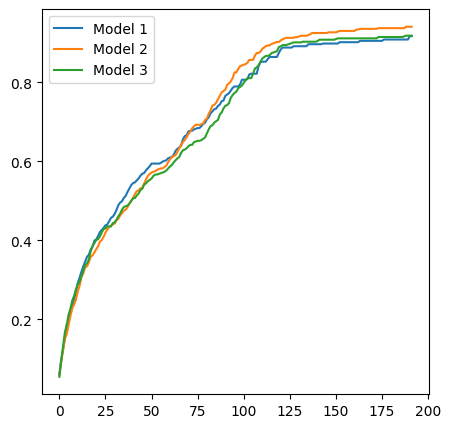

Data 1:
Percentage EV's van Auto's: 0.9432989690721649
Hoeveelheid totale Subsidie: 1751038.18800295
Percentage late majority met EV: 0.7320754716981132
Percentage laggards met EV: 0.6746031746031746

Data 2:
Percentage EV's van Auto's: 0.9273356401384083
Hoeveelheid totale Subsidie: 624500.0
Percentage late majority met EV: 0.7191011235955056
Percentage laggards met EV: 0.6904761904761905

Data 3:
Percentage EV's van Auto's: 0.9181184668989547
Hoeveelheid totale Subsidie: 893617.2175748259
Percentage late majority met EV: 0.6816479400749064
Percentage laggards met EV: 0.7142857142857143



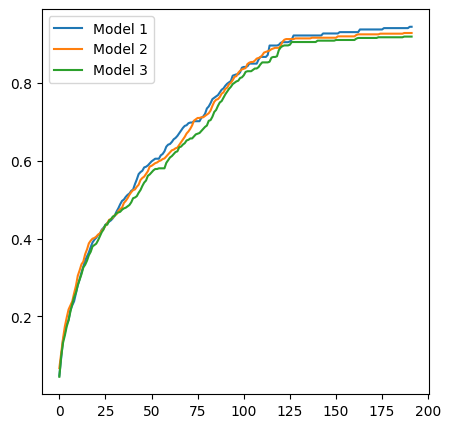

Data 1:
Percentage EV's van Auto's: 0.924956369982548
Hoeveelheid totale Subsidie: 1732103.3884125573
Percentage late majority met EV: 0.6479400749063671
Percentage laggards met EV: 0.746031746031746

Data 2:
Percentage EV's van Auto's: 0.9193277310924369
Hoeveelheid totale Subsidie: 660300.0
Percentage late majority met EV: 0.7132075471698113
Percentage laggards met EV: 0.6904761904761905

Data 3:
Percentage EV's van Auto's: 0.9290540540540541
Hoeveelheid totale Subsidie: 942956.3438050991
Percentage late majority met EV: 0.6867924528301886
Percentage laggards met EV: 0.7380952380952381



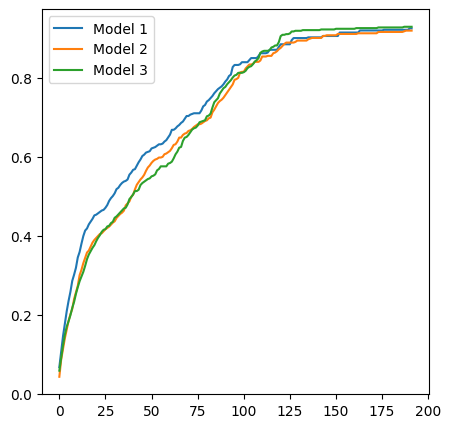

Data 1:
Percentage EV's van Auto's: 0.9357142857142857
Hoeveelheid totale Subsidie: 1683825.7750198105
Percentage late majority met EV: 0.6339622641509434
Percentage laggards met EV: 0.6507936507936508

Data 2:
Percentage EV's van Auto's: 0.9270833333333334
Hoeveelheid totale Subsidie: 630300.0
Percentage late majority met EV: 0.7094339622641509
Percentage laggards met EV: 0.5873015873015873

Data 3:
Percentage EV's van Auto's: 0.9345955249569707
Hoeveelheid totale Subsidie: 869740.2827108979
Percentage late majority met EV: 0.704119850187266
Percentage laggards met EV: 0.6428571428571429



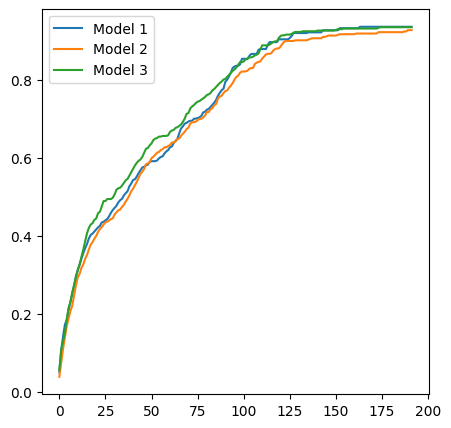

Data 1:
Percentage EV's van Auto's: 0.9205526770293609
Hoeveelheid totale Subsidie: 1712935.9204735102
Percentage late majority met EV: 0.6479400749063671
Percentage laggards met EV: 0.6746031746031746

Data 2:
Percentage EV's van Auto's: 0.9083191850594228
Hoeveelheid totale Subsidie: 614100.0
Percentage late majority met EV: 0.660377358490566
Percentage laggards met EV: 0.5952380952380952

Data 3:
Percentage EV's van Auto's: 0.92
Hoeveelheid totale Subsidie: 901344.3805013385
Percentage late majority met EV: 0.6616541353383458
Percentage laggards met EV: 0.6587301587301587



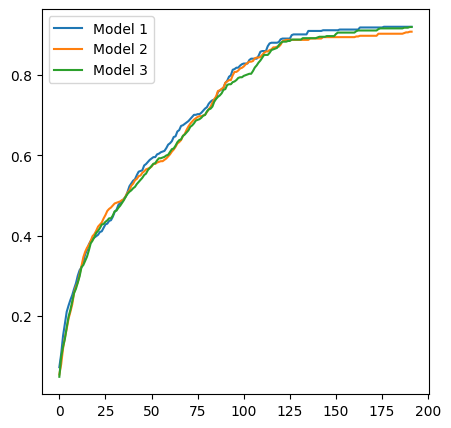

In [1]:
from BaseModel import BaseModelSub
from SubsidieModel import SubsidieModel
from SubsidieModelLinear import SubsidieModel2
from SubsidieModel3 import SubsidieModel3

import random
import numpy as np
import matplotlib.pyplot as plt

scenario1 = [32000, 396000]
scenario2 = [40000, 33000]
scenario3 = [48000, 26400]

aantal_iteraties = 5

avg_percentage_ev = np.zeros((aantal_iteraties))

for iteratie in range(aantal_iteraties):
    ev = scenario1[0]
    fba = scenario1[1]

    model1 = SubsidieModel(ev, fba)
    model2 = SubsidieModel2(ev, fba)
    model3 = SubsidieModel3(ev, fba)
    for j in range(192):
        model1.step()
        model2.step()
        model3.step()

        
    data1 = model1.datacollector.get_model_vars_dataframe()
    data2 = model2.datacollector.get_model_vars_dataframe()
    data3 = model3.datacollector.get_model_vars_dataframe()

    datasets = [data1, data2, data3]
    labels = ['Data 1', 'Data 2', 'Data 3']

    for label, dataset in zip(labels, datasets):
        last_row = dataset.iloc[-1]
        percentage_ev = last_row["Percerntage EV's van Auto's"]
        hoeveelheid_sub = last_row["Hoeveelheid totale Subsidie"]
        percentage_late_majority_ev = last_row["Percentage late majority met EV"]
        percentage_laggards_ev = last_row["Percentage laggards met EV"]
    
        print(label + ':')
        print(f"Percentage EV's van Auto's: {percentage_ev}")
        print(f"Hoeveelheid totale Subsidie: {hoeveelheid_sub}")
        print(f"Percentage late majority met EV: {percentage_late_majority_ev}")
        print(f"Percentage laggards met EV: {percentage_laggards_ev}")
        print()


    
    plt.figure(figsize=(5, 5))

    # Lijnen tekenen voor elk model
    plt.plot(data1["Percerntage EV's van Auto's"], label='Model 1')
    plt.plot(data2["Percerntage EV's van Auto's"], label='Model 2')
    plt.plot(data3["Percerntage EV's van Auto's"], label='Model 3')

    plt.legend()  # Voegt de legenda toe
    plt.show()

Data 4:
Percentage EV's van Auto's: 0.879045996592845
Hoeveelheid totale Subsidie: 1399829.9175857003
Percentage late majority met EV: 0.6691729323308271
Percentage laggards met EV: 0.6507936507936508

Data 5:
Percentage EV's van Auto's: 0.8739352640545145
Hoeveelheid totale Subsidie: 1051100.0
Percentage late majority met EV: 0.6142322097378277
Percentage laggards met EV: 0.6587301587301587

Data 6:
Percentage EV's van Auto's: 0.8917431192660551
Hoeveelheid totale Subsidie: 1160115.602205334
Percentage late majority met EV: 0.630188679245283
Percentage laggards met EV: 0.5873015873015873



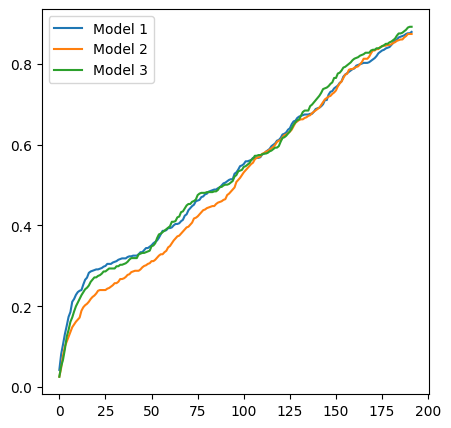

Data 4:
Percentage EV's van Auto's: 0.8904847396768402
Hoeveelheid totale Subsidie: 1348544.4635942453
Percentage late majority met EV: 0.6528301886792452
Percentage laggards met EV: 0.6190476190476191

Data 5:
Percentage EV's van Auto's: 0.8877374784110535
Hoeveelheid totale Subsidie: 1036000.0
Percentage late majority met EV: 0.6754716981132075
Percentage laggards met EV: 0.6507936507936508

Data 6:
Percentage EV's van Auto's: 0.8568935427574171
Hoeveelheid totale Subsidie: 1168364.9209118658
Percentage late majority met EV: 0.569811320754717
Percentage laggards met EV: 0.5476190476190477



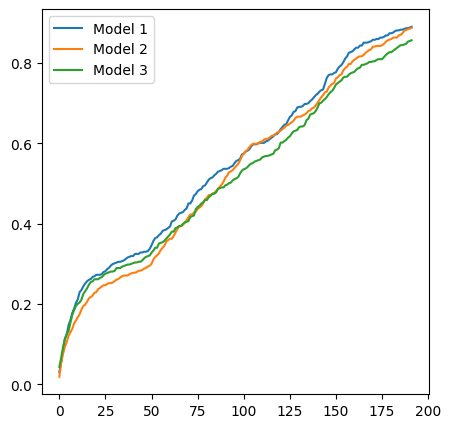

Data 4:
Percentage EV's van Auto's: 0.9045226130653267
Hoeveelheid totale Subsidie: 1445450.2846018318
Percentage late majority met EV: 0.6566037735849056
Percentage laggards met EV: 0.6904761904761905

Data 5:
Percentage EV's van Auto's: 0.9008547008547009
Hoeveelheid totale Subsidie: 1022300.0
Percentage late majority met EV: 0.700374531835206
Percentage laggards met EV: 0.753968253968254

Data 6:
Percentage EV's van Auto's: 0.8831858407079646
Hoeveelheid totale Subsidie: 1223027.3569607558
Percentage late majority met EV: 0.6278195488721805
Percentage laggards met EV: 0.6428571428571429



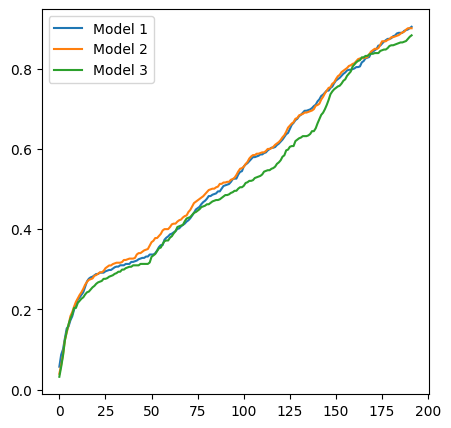

Data 4:
Percentage EV's van Auto's: 0.9021922428330523
Hoeveelheid totale Subsidie: 1419550.0528268025
Percentage late majority met EV: 0.7116104868913857
Percentage laggards met EV: 0.7222222222222222

Data 5:
Percentage EV's van Auto's: 0.8802698145025295
Hoeveelheid totale Subsidie: 1035500.0
Percentage late majority met EV: 0.6015037593984962
Percentage laggards met EV: 0.6349206349206349

Data 6:
Percentage EV's van Auto's: 0.9022687609075044
Hoeveelheid totale Subsidie: 1248641.7353898475
Percentage late majority met EV: 0.6830188679245283
Percentage laggards met EV: 0.6746031746031746



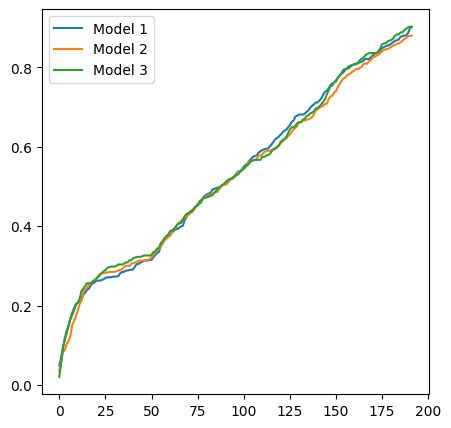

Data 4:
Percentage EV's van Auto's: 0.8998302207130731
Hoeveelheid totale Subsidie: 1388605.6411260802
Percentage late majority met EV: 0.6704119850187266
Percentage laggards met EV: 0.6825396825396826

Data 5:
Percentage EV's van Auto's: 0.9186851211072664
Hoeveelheid totale Subsidie: 1052800.0
Percentage late majority met EV: 0.6679245283018868
Percentage laggards met EV: 0.6904761904761905

Data 6:
Percentage EV's van Auto's: 0.9058823529411765
Hoeveelheid totale Subsidie: 1270999.2805216736
Percentage late majority met EV: 0.7228464419475655
Percentage laggards met EV: 0.6428571428571429



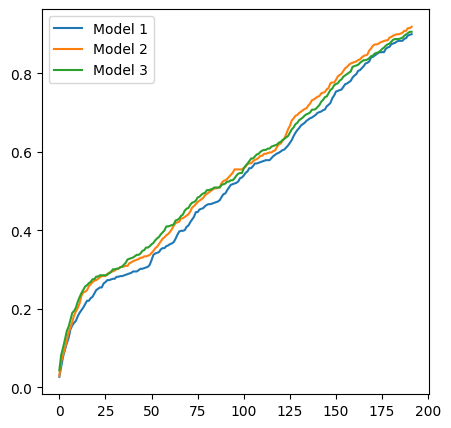

In [2]:
from BaseModel import BaseModelSub
from SubsidieModel import SubsidieModel
from SubsidieModelLinear import SubsidieModel2
from SubsidieModel3 import SubsidieModel3

import random
import numpy as np
import matplotlib.pyplot as plt

avg_percentage_ev2 = np.zeros((aantal_iteraties))

for iteratie in range(aantal_iteraties):
    ev = scenario2[0]
    fba = scenario2[1]

    model4 = SubsidieModel(ev, fba)
    model5 = SubsidieModel2(ev, fba)
    model6 = SubsidieModel3(ev, fba)
    for j in range(192):
        model4.step()
        model5.step()
        model6.step()

        
    data4 = model4.datacollector.get_model_vars_dataframe()
    data5 = model5.datacollector.get_model_vars_dataframe()
    data6 = model6.datacollector.get_model_vars_dataframe()
    
    datasets = [data4, data5, data6]

    labels = ['Data 4', 'Data 5', 'Data 6']

    for label, dataset in zip(labels, datasets):
        last_row = dataset.iloc[-1]
        percentage_ev = last_row["Percerntage EV's van Auto's"]
        hoeveelheid_sub = last_row["Hoeveelheid totale Subsidie"]
        percentage_late_majority_ev = last_row["Percentage late majority met EV"]
        percentage_laggards_ev = last_row["Percentage laggards met EV"]
    
        print(label + ':')
        print(f"Percentage EV's van Auto's: {percentage_ev}")
        print(f"Hoeveelheid totale Subsidie: {hoeveelheid_sub}")
        print(f"Percentage late majority met EV: {percentage_late_majority_ev}")
        print(f"Percentage laggards met EV: {percentage_laggards_ev}")
        print()


    # Lijnen tekenen voor elk model
    plt.figure(figsize=(5, 5))

    # Lijnen tekenen voor elk model
    plt.plot(data4["Percerntage EV's van Auto's"], label='Model 1')
    plt.plot(data5["Percerntage EV's van Auto's"], label='Model 2')
    plt.plot(data6["Percerntage EV's van Auto's"], label='Model 3')

    plt.legend()  # Voegt de legenda toe
    plt.show()

    


Data 7:
Percentage EV's van Auto's: 0.8373287671232876
Hoeveelheid totale Subsidie: 1343213.278295984
Percentage late majority met EV: 0.6441947565543071
Percentage laggards met EV: 0.6190476190476191

Data 8:
Percentage EV's van Auto's: 0.8306878306878307
Hoeveelheid totale Subsidie: 850800.0
Percentage late majority met EV: 0.5735849056603773
Percentage laggards met EV: 0.6111111111111112

Data 9:
Percentage EV's van Auto's: 0.8536155202821869
Hoeveelheid totale Subsidie: 1098857.3003077377
Percentage late majority met EV: 0.5773584905660377
Percentage laggards met EV: 0.6349206349206349



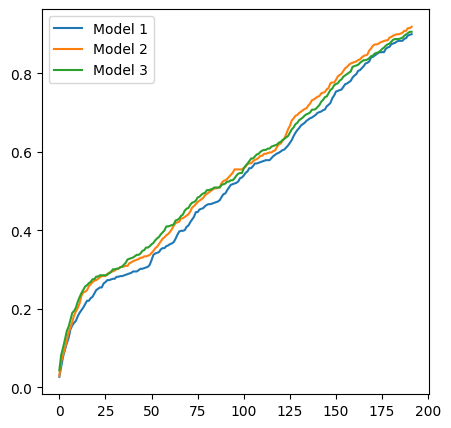

Data 7:
Percentage EV's van Auto's: 0.8162544169611308
Hoeveelheid totale Subsidie: 1267234.7596150083
Percentage late majority met EV: 0.5584905660377358
Percentage laggards met EV: 0.626984126984127

Data 8:
Percentage EV's van Auto's: 0.797945205479452
Hoeveelheid totale Subsidie: 803400.0
Percentage late majority met EV: 0.5547169811320755
Percentage laggards met EV: 0.6190476190476191

Data 9:
Percentage EV's van Auto's: 0.8324697754749568
Hoeveelheid totale Subsidie: 1029794.1226380081
Percentage late majority met EV: 0.6226415094339622
Percentage laggards met EV: 0.5555555555555556



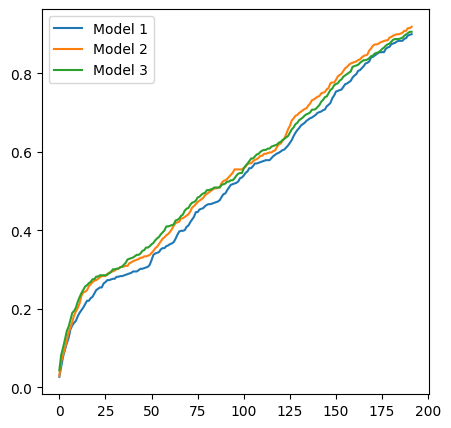

Data 7:
Percentage EV's van Auto's: 0.8175438596491228
Hoeveelheid totale Subsidie: 1236137.6637981874
Percentage late majority met EV: 0.6554307116104869
Percentage laggards met EV: 0.5238095238095238

Data 8:
Percentage EV's van Auto's: 0.8131487889273357
Hoeveelheid totale Subsidie: 880300.0
Percentage late majority met EV: 0.5735849056603773
Percentage laggards met EV: 0.6746031746031746

Data 9:
Percentage EV's van Auto's: 0.8282312925170068
Hoeveelheid totale Subsidie: 1049745.5394812662
Percentage late majority met EV: 0.6
Percentage laggards met EV: 0.626984126984127



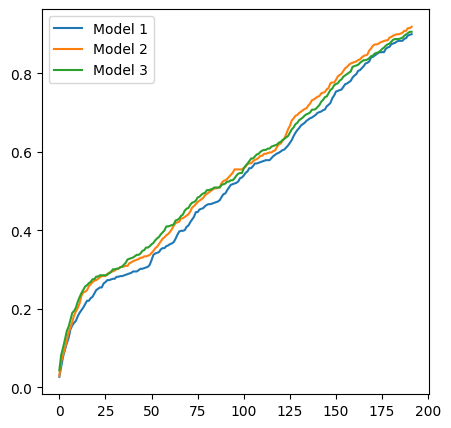

Data 7:
Percentage EV's van Auto's: 0.8144329896907216
Hoeveelheid totale Subsidie: 1287232.5219834177
Percentage late majority met EV: 0.6037735849056604
Percentage laggards met EV: 0.6428571428571429

Data 8:
Percentage EV's van Auto's: 0.8158347676419966
Hoeveelheid totale Subsidie: 778200.0
Percentage late majority met EV: 0.5917602996254682
Percentage laggards met EV: 0.6031746031746031

Data 9:
Percentage EV's van Auto's: 0.8257191201353637
Hoeveelheid totale Subsidie: 1067987.4259184888
Percentage late majority met EV: 0.6264150943396226
Percentage laggards met EV: 0.6746031746031746



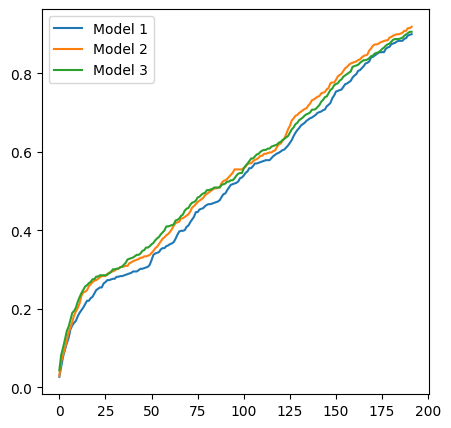

Data 7:
Percentage EV's van Auto's: 0.8333333333333334
Hoeveelheid totale Subsidie: 1302446.958638391
Percentage late majority met EV: 0.6415094339622641
Percentage laggards met EV: 0.626984126984127

Data 8:
Percentage EV's van Auto's: 0.8377926421404682
Hoeveelheid totale Subsidie: 850900.0
Percentage late majority met EV: 0.6441947565543071
Percentage laggards met EV: 0.6666666666666666

Data 9:
Percentage EV's van Auto's: 0.8211805555555556
Hoeveelheid totale Subsidie: 1019989.5632549212
Percentage late majority met EV: 0.5955056179775281
Percentage laggards met EV: 0.5714285714285714



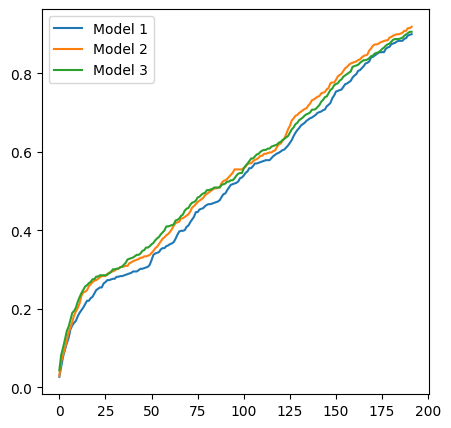

In [3]:
from BaseModel import BaseModelSub
from SubsidieModel import SubsidieModel
from SubsidieModelLinear import SubsidieModel2
from SubsidieModel3 import SubsidieModel3

import random
import numpy as np
import matplotlib.pyplot as plt

avg_percentage_ev3 = np.zeros((aantal_iteraties))

for iteratie in range(aantal_iteraties):
    ev = scenario3[0]
    fba = scenario3[1]

    model7 = SubsidieModel(ev, fba)
    model8 = SubsidieModel2(ev, fba)
    model9 = SubsidieModel3(ev, fba)
    for j in range(192):
        model7.step()
        model8.step()
        model9.step()

        
    data7 = model7.datacollector.get_model_vars_dataframe()
    data8 = model8.datacollector.get_model_vars_dataframe()
    data9 = model9.datacollector.get_model_vars_dataframe()
    
    datasets = [data7, data8, data9]
    labels = ['Data 7', 'Data 8', 'Data 9']

    for label, dataset in zip(labels, datasets):
        last_row = dataset.iloc[-1]
        percentage_ev = last_row["Percerntage EV's van Auto's"]
        hoeveelheid_sub = last_row["Hoeveelheid totale Subsidie"]
        percentage_late_majority_ev = last_row["Percentage late majority met EV"]
        percentage_laggards_ev = last_row["Percentage laggards met EV"]
    
        print(label + ':')
        print(f"Percentage EV's van Auto's: {percentage_ev}")
        print(f"Hoeveelheid totale Subsidie: {hoeveelheid_sub}")
        print(f"Percentage late majority met EV: {percentage_late_majority_ev}")
        print(f"Percentage laggards met EV: {percentage_laggards_ev}")
        print()


    # Lijnen tekenen voor elk model
    plt.figure(figsize=(5, 5))

    # Lijnen tekenen voor elk model
    plt.plot(data4["Percerntage EV's van Auto's"], label='Model 1')
    plt.plot(data5["Percerntage EV's van Auto's"], label='Model 2')
    plt.plot(data6["Percerntage EV's van Auto's"], label='Model 3')

    plt.legend()  # Voegt de legenda toe
    plt.show()